In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ITBAN3 - Fundamentals of Analytics Modelling | 2nd Sem AY 2023-2024

/content/drive/MyDrive/ITBAN3 - Fundamentals of Analytics Modelling | 2nd Sem AY 2023-2024


#Step 1: Using the Colab notebook, import the following packages/ libraries/ modules:

- OS

- Numpy

- Pandas

- Matplotlib

- Seaborn

- Warnings (to suppress warnings)

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

#Step 2: Import and load the dataset. Set the client_id as the index.

In [5]:
df = pd.read_csv('loans.csv', index_col='client_id')

#Step 3: Display the contents of the dataset by showing its first 5 rows.

In [6]:
df.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


#Step 4: Check the info of the dataset and the datatypes for each columns.

In [7]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


#Step 5: Determine whether the dataset has missing values.

In [8]:
("Missing values:\n", df.isnull().sum())

('Missing values:\n',
 loan_type      0
 loan_amount    0
 repaid         0
 loan_id        0
 loan_start     0
 loan_end       0
 rate           0
 dtype: int64)

#Step 6: Check if there is a presence of outliers using Boxplot.

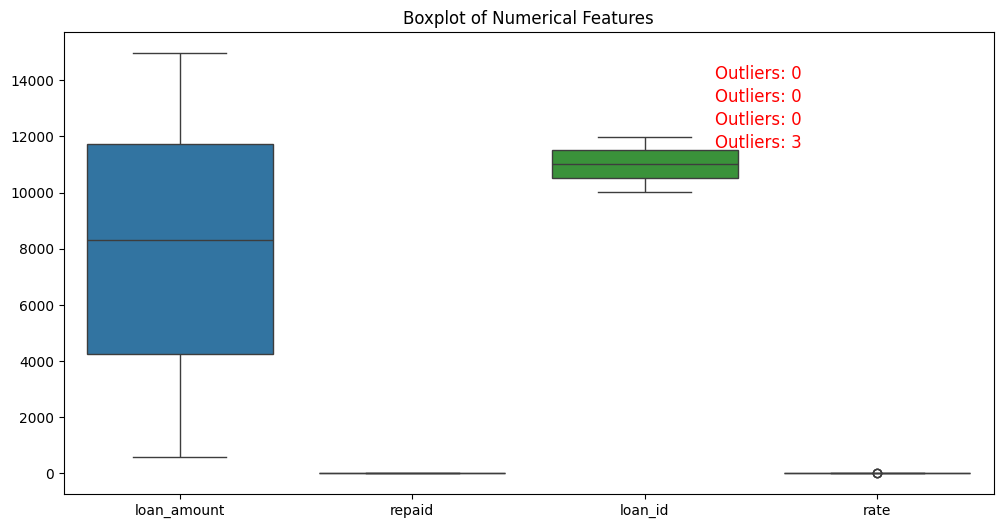

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features")

numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    plt.annotate(f'Outliers: {num_outliers}',
                 xy=(0.7, 0.9 - 0.05 * numerical_columns.get_loc(column)),
                 xycoords='axes fraction', fontsize=12, color='red')

plt.show()


#Step 7: If there are a presence of outliers, do the following and explain the results:


A. Treat them using SQRT transformation

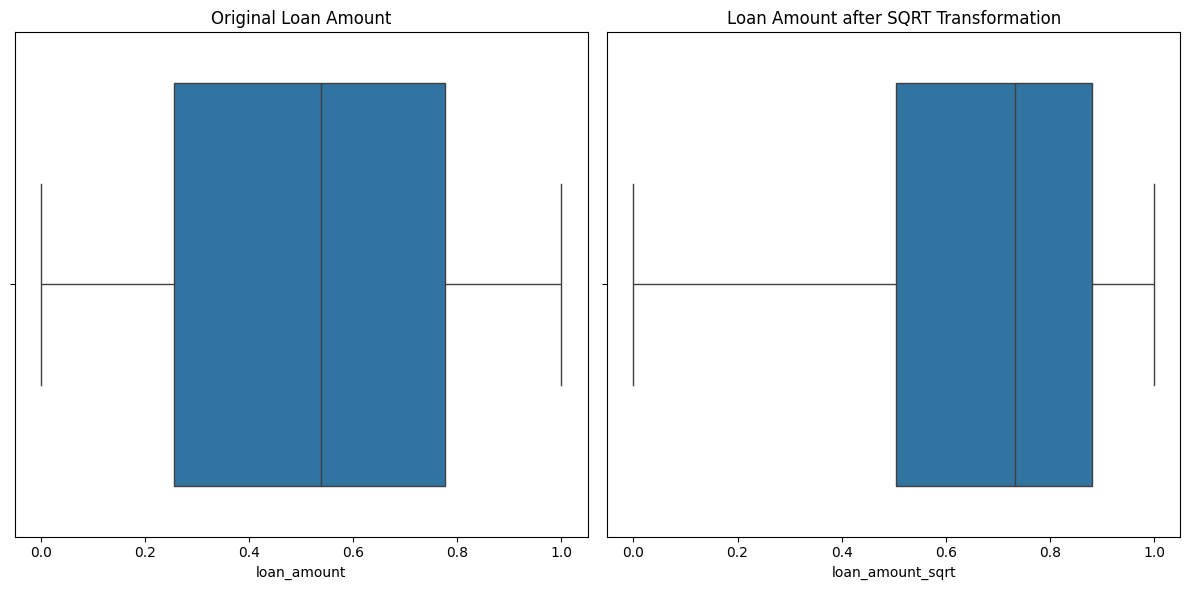

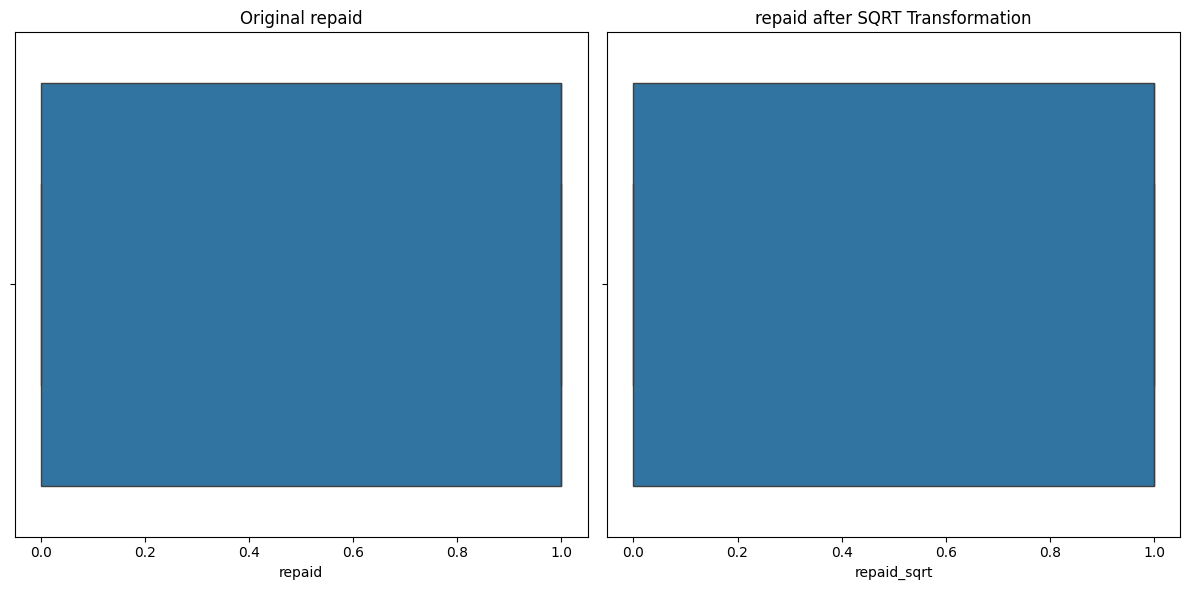

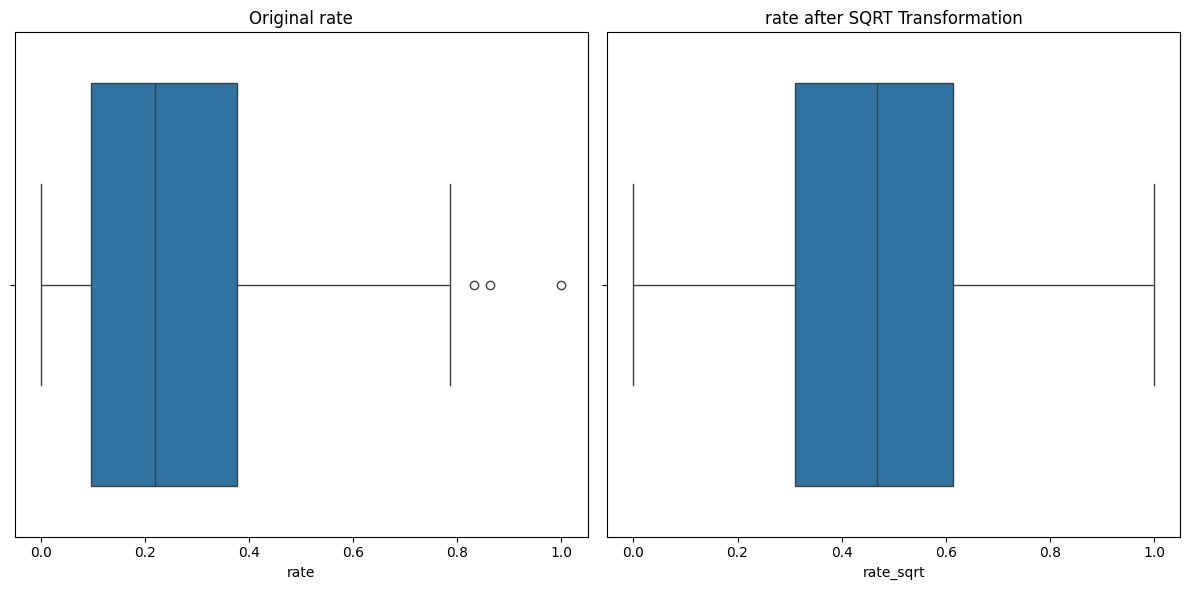

In [23]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['loan_amount_sqrt'] = np.sqrt(df['loan_amount'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_amount'])
plt.title('Original Loan Amount')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['loan_amount_sqrt'])
plt.title('Loan Amount after SQRT Transformation')

plt.tight_layout()
plt.show()

# Assuming df is your DataFrame
numeric_columns = ['repaid']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['repaid_sqrt'] = np.sqrt(df['repaid'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['repaid'])
plt.title('Original repaid')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['repaid_sqrt'])
plt.title('repaid after SQRT Transformation')

plt.tight_layout()
plt.show()

# Assuming df is your DataFrame
numeric_columns = ['rate']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['rate_sqrt'] = np.sqrt(df['rate'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['rate'])
plt.title('Original rate')

# Square root transformed data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sqrt_transformed['rate_sqrt'])
plt.title('rate after SQRT Transformation')

plt.tight_layout()
plt.show()

B. Treat them using the capping approach: Z-Score.

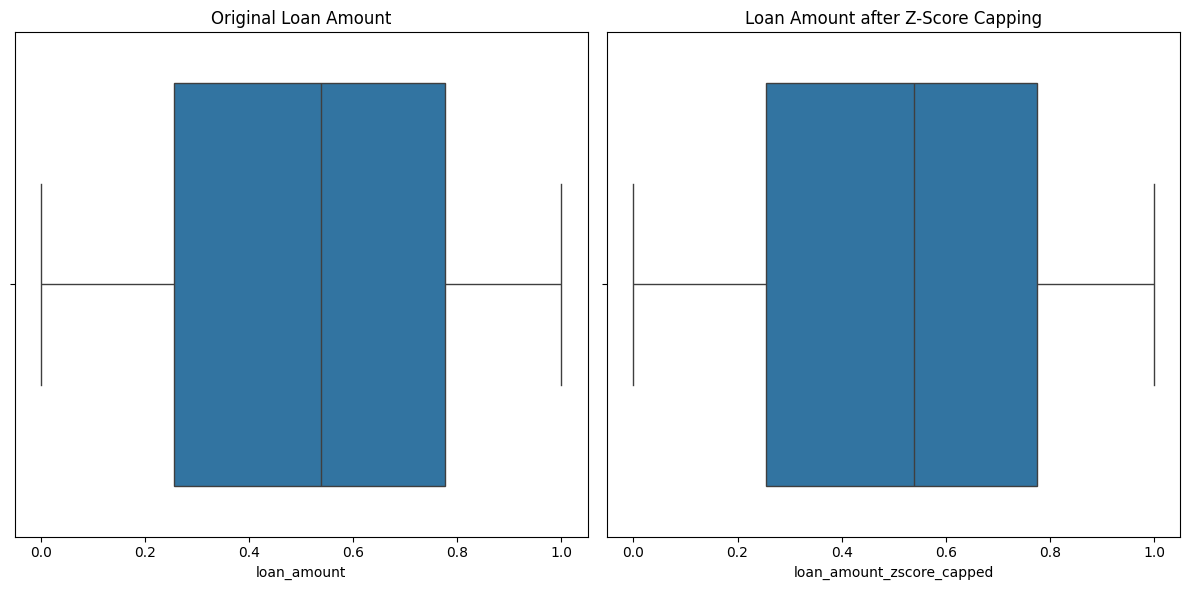

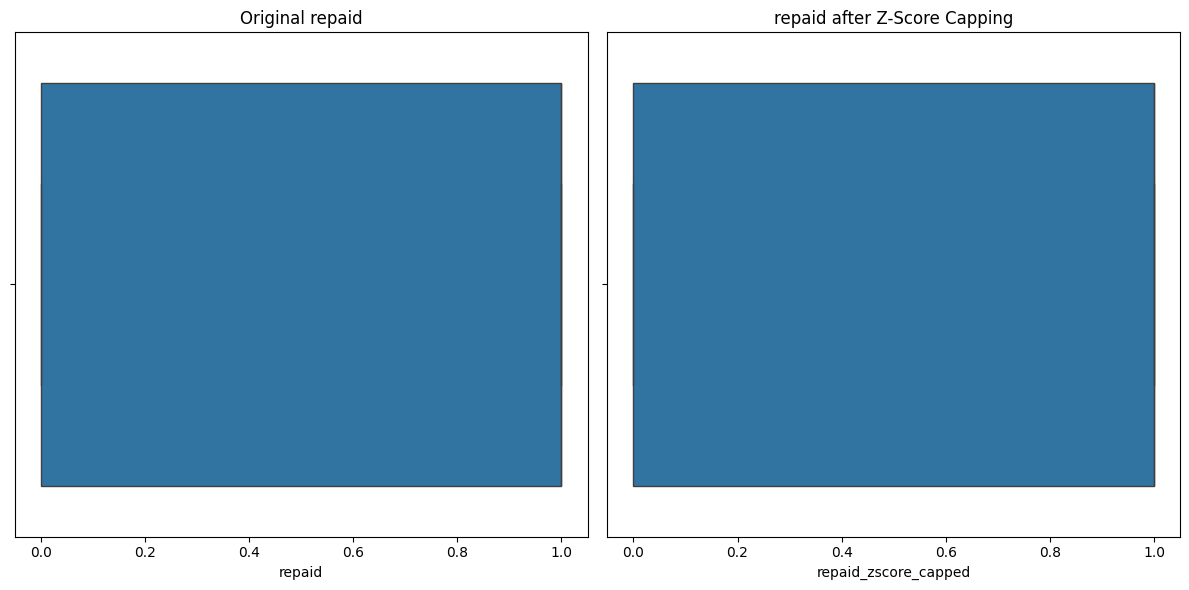

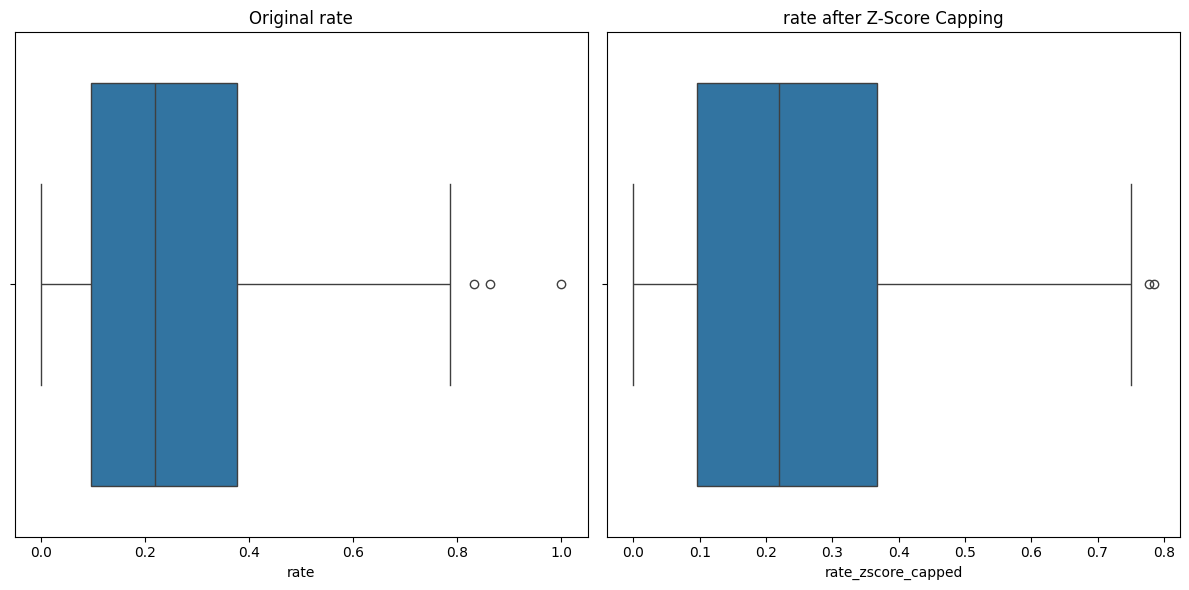

In [22]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount']

# Calculate z-scores
z_scores = zscore(df['loan_amount'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['loan_amount_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['loan_amount']), df['loan_amount'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['loan_amount'])
plt.title('Original Loan Amount')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['loan_amount_zscore_capped'])
plt.title('Loan Amount after Z-Score Capping')

plt.tight_layout()
plt.show()

# Assuming df is your DataFrame
numeric_columns = ['repaid']

# Calculate z-scores
z_scores = zscore(df['repaid'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['repaid_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['repaid']), df['repaid'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['repaid'])
plt.title('Original repaid')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['repaid_zscore_capped'])
plt.title('repaid after Z-Score Capping')

plt.tight_layout()
plt.show()

# Assuming df is your DataFrame
numeric_columns = ['rate']

# Calculate z-scores
z_scores = zscore(df['rate'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['rate_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['rate']), df['rate'])

# Create side-by-side boxplots
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(x=df['rate'])
plt.title('Original rate')

# Z-score capped data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_capped['rate_zscore_capped'])
plt.title('rate after Z-Score Capping')

plt.tight_layout()
plt.show()

#Step 8: Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

Apply Min-Max Normalization to numerical variables

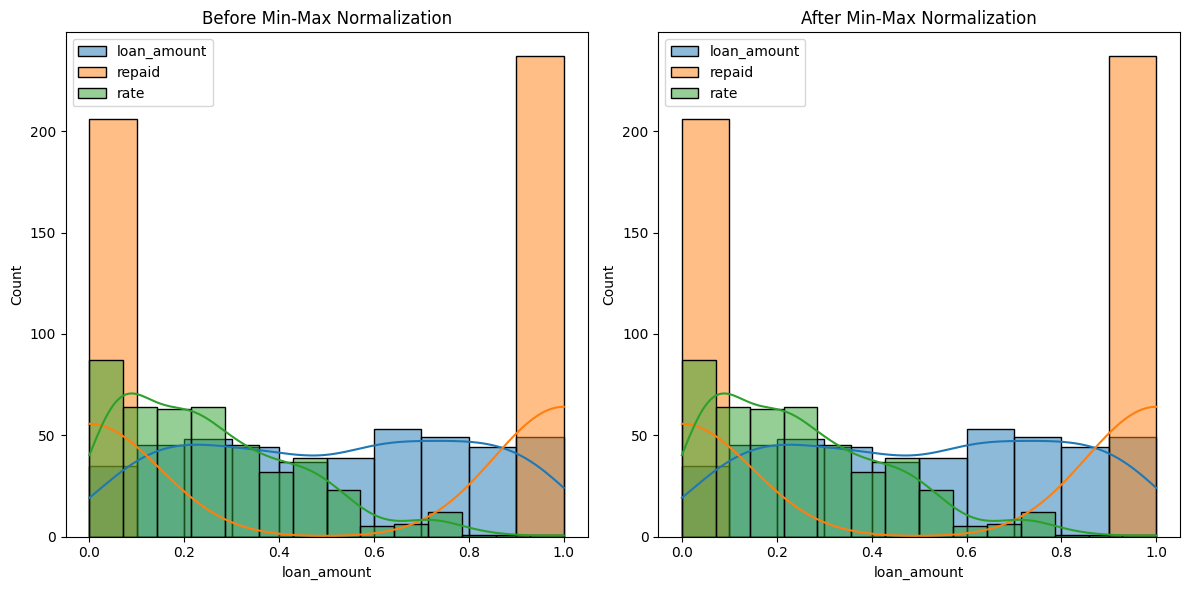

In [25]:


# Assuming df is your DataFrame
numeric_columns = ['loan_amount', 'repaid', 'rate']

# Create a copy of the DataFrame for visualization
df_normalized = df.copy()

# Apply Min-Max Normalization
scaler = MinMaxScaler()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Visualize the distributions before and after normalization
plt.figure(figsize=(12, 6))

# Before normalization
plt.subplot(1, 2, 1)
for col in numeric_columns:
    sns.histplot(df[col], kde=True, label=col, alpha=0.5)
plt.title('Before Min-Max Normalization')
plt.legend()

# After normalization
plt.subplot(1, 2, 2)
for col in numeric_columns:
    sns.histplot(df_normalized[col], kde=True, label=col, alpha=0.5)
plt.title('After Min-Max Normalization')
plt.legend()

plt.tight_layout()
plt.show()


Display skewness and kurtosis graphs for Loan Amount

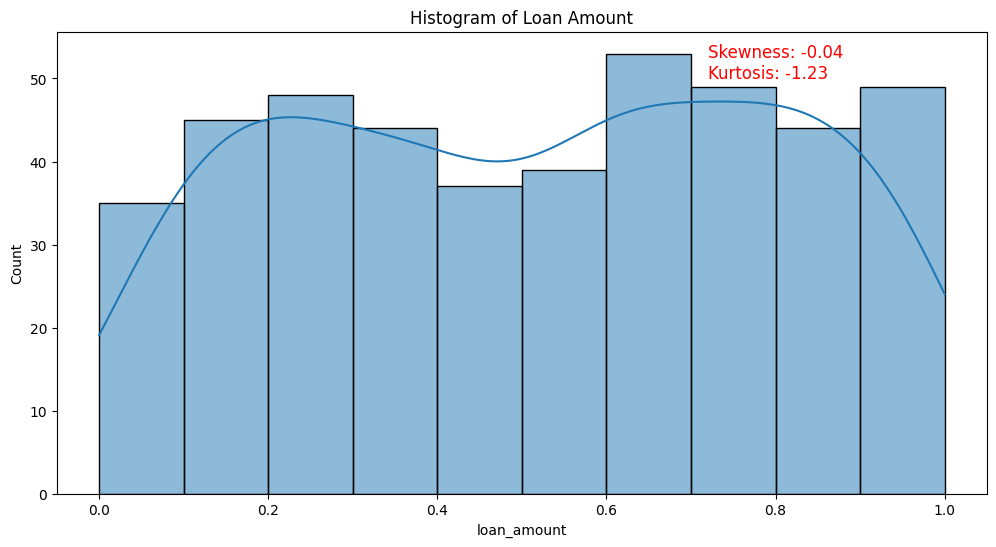

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['loan_amount'], kde=True)
plt.title("Histogram of Loan Amount")

skewness = df['loan_amount'].skew()
kurtosis = df['loan_amount'].kurtosis()

plt.annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
             xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')

plt.show()


Skewness is a statistical measure that describes the asymmetry of a probability distribution. It indicates the extent to which a distribution deviates from being symmetrical.

Formula:
Skewness = (3 * (Mean - Median)) / Standard Deviation

where:
Mean: The average value of the dataset.
Median: The middle value of the dataset when it is sorted in ascending order.
Standard Deviation: A measure of the spread of the dataset.

Base on the result of skewness value of -0.04 is close to zero, suggesting a distribution that is approximately symmetric. It indicates a subtle tendency towards being left-skewed, but the skewness is very close to zero, so the distribution is relatively balanced.


---


Kurtosis: Kurtosis measures the peakedness or flatness of a distribution.
Kurtosis is a statistical measure that describes the shape of a probability distribution. It quantifies the heaviness of the tails and the presence of outliers in a distribution.

Formula:
Kurtosis = (Sum of (x - Mean)^4) / (n * Standard Deviation^4)

where:
x: Each value in the dataset.
Mean: The average value of the dataset.
n: The number of values in the dataset.
Standard Deviation: A measure of the spread of the dataset.

kurtosis value of -1.23 is negative, suggesting a distribution that is somewhat platykurtic. This means that the distribution has lighter tails and a flatter central peak compared to a normal distribution.

#Step 9: As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [32]:
df_encoded = pd.get_dummies(df)
(df_encoded.head())

,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure_days,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
client_id,,,,,,,,,,,
46109,0.909867,0.0,0.118063,2002-04-16,2003-12-20,0.169707,613,0,0,1,0
46109,0.640785,0.0,0.491927,2003-10-21,2005-07-17,0.098335,635,0,1,0,0
46109,0.844782,1.0,0.494955,2006-02-01,2007-07-05,0.053132,519,0,0,1,0
46109,0.829795,1.0,0.296165,2010-12-08,2013-05-05,0.097542,879,1,0,0,0
46109,0.936026,1.0,0.709384,2010-07-07,2012-05-21,0.247423,684,0,1,0,0


#Step 10: Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [27]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df['loan_tenure_days'] = (df['loan_end'] - df['loan_start']).dt.days

(df[['loan_start', 'loan_end', 'loan_tenure_days']].head())

,loan_start,loan_end,loan_tenure_days
client_id,,,
46109,2002-04-16,2003-12-20,613
46109,2003-10-21,2005-07-17,635
46109,2006-02-01,2007-07-05,519
46109,2010-12-08,2013-05-05,879
46109,2010-07-07,2012-05-21,684


#Step 11: Split the data into training and test sets with 80-20 division.

In [31]:
from sklearn.model_selection import train_test_split

features = df.drop(['loan_amount', 'loan_id', 'loan_start', 'loan_end'], axis=1)
target = df['loan_amount']

print("Features shape:", features.shape)
print("Target shape:", target.shape)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (443, 4)
Target shape: (443,)
x_train shape: (354, 4)
x_test shape: (89, 4)
y_train shape: (354,)
y_test shape: (89,)
